# Analysis of Loans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

In [2]:
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('loan_data.csv', sep=',')

In [71]:
print(df.shape)
print(df.columns)
df.head()

(239046, 9)
Index(['member_id', 'loan_amnt', 'int_rate', 'issue_d', 'loan_status',
       'fico_range_low', 'fico_range_high', 'annual_inc', 'last_pymnt_d'],
      dtype='object')


,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d
0,35784929,18000,9.17%,Oct 2014,Fully Paid,700,704,150000,Oct 2015
1,35914827,14000,11.67%,Oct 2014,Current,670,674,135000,Oct 2015
2,35985086,8400,9.17%,Oct 2014,Current,665,669,75000,Oct 2015
3,35945193,10000,7.69%,Oct 2014,Current,730,734,94000,Oct 2015
4,35754571,2000,12.99%,Oct 2014,Current,680,684,150000,Oct 2015


In [72]:
# Spread in fico score range
serfico = df['fico_range_high']-df['fico_range_low']
serfico.describe()

count    239046.000000
mean          4.000134
std           0.011569
min           4.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
dtype: float64

In [73]:
print(serfico.unique().tolist())

[4, 5]


# 1. What is the relationship between FICO score and interest rate?

In [74]:
df['int_rate_float']=df['int_rate'].apply(lambda x: float(x.strip("%"))*0.01)

In [237]:
lr1 = LinearRegression()
lr1.fit(df['fico_range_low'].values[:,np.newaxis],df['int_rate_float'])
print('Coef:',lr1.coef_,'Intercept:',lr1.intercept_)

Coef: [-0.0005238] Intercept: 0.477690790163


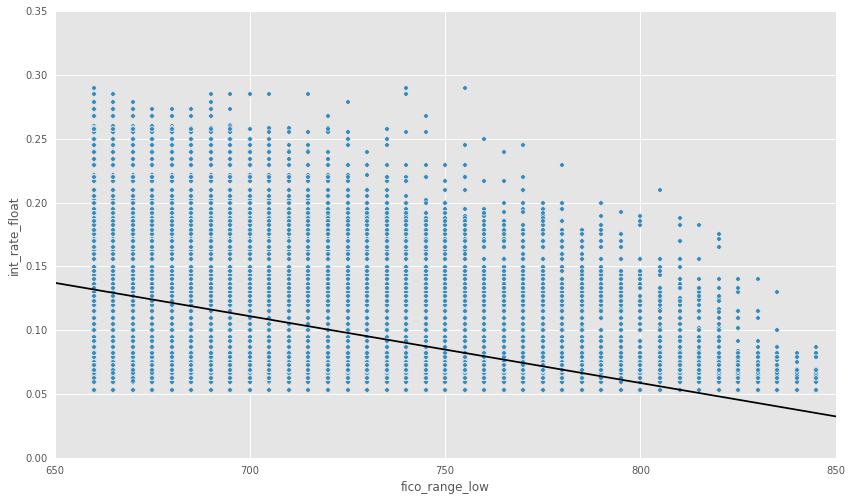

In [239]:
# Visualize data
start = 650
stop = 850
line = np.linspace(start,stop)

df.plot(kind='scatter', x='fico_range_low', y='int_rate_float', figsize=(14,8), xlim=(start,stop))
plt.plot(line,lr1.intercept_+lr1.coef_*line,color='black')

In [83]:
# Violin plot to visualize changing spread

bins = [650,700,750,800,850]
groups = ['<700','700-750','750-800','>800']
categories = pd.cut(df['fico_range_low'], bins, labels=groups)
df['categories'] = pd.cut(df['fico_range_low'], bins, labels=groups)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


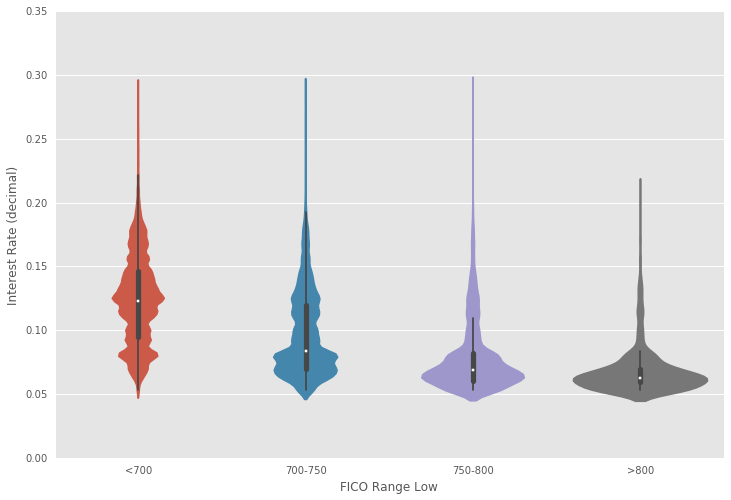

In [84]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x=df['categories'],y=df['int_rate_float'])
ax.set_xlabel('FICO Range Low')
ax.set_ylabel('Interest Rate (decimal)')

In [202]:
# Covariance and pearson's correlation
print('Covariance:', df['int_rate_float'].cov(df['fico_range_low']))
print('Correlation:', df['int_rate_float'].corr(df['fico_range_low'],method='pearson'))

Covariance: -0.479508196751
Correlation: -0.425384027047


## Answer to #1

Interest rates decrease in both mean value and spread with increasing FICO scores according to the above violin plot. In addition, pearson's correlation coefficient between the two variables is a moderately negative value (on a scale from -1 to 1) adding additional support. The maximum value of the interest rate decreases with FICO score but the minimum value remains the same.

The FICO low range is used for comparison since there is only a spread of 4 or 5 points between the low and high range which is a small fraction of the value. Also, I assume the FICO score is used to determine the interest rate so FICO is the independent variable and interest rate the dependent variable.

# 2. What is the relationship between loan size and interest rate?

In [236]:
lr2 = LinearRegression()
lr2.fit(df['loan_amnt'].values[:,np.newaxis],df['int_rate_float'])
print('Coef:',lr2.coef_,'Intercept:',lr2.intercept_)

Coef: [ -4.41794005e-07] Intercept: 0.120374964491


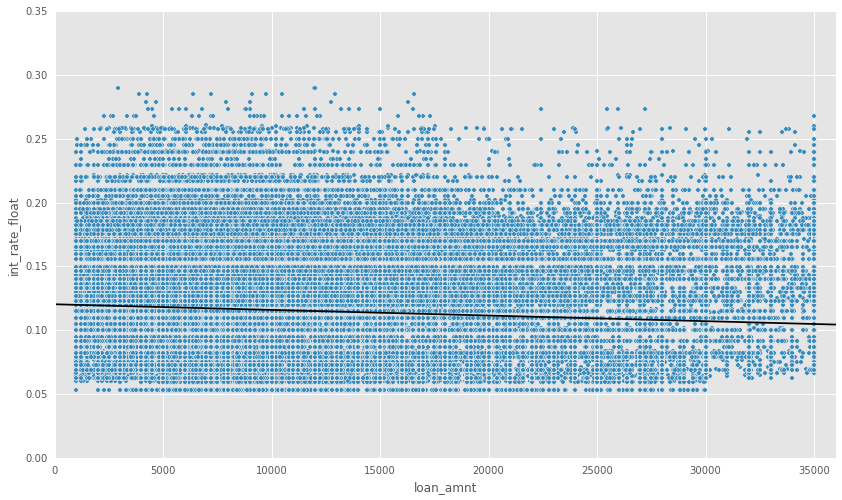

In [234]:
# Visualize data
start = 0
stop = 36000
line = np.linspace(start,stop)

df.plot(kind='scatter', x='loan_amnt', y='int_rate_float', figsize=(14,8), xlim=(start,stop))
plt.plot(line,lr2.intercept_+lr2.coef_*line,color='black')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


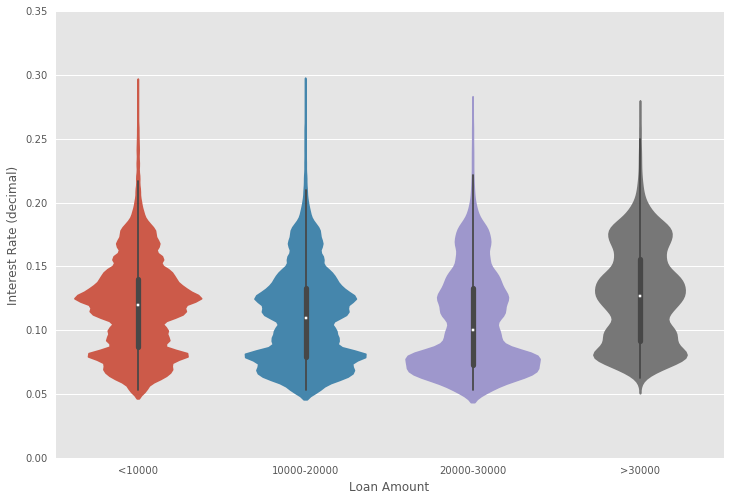

In [86]:
# Violin plot to visualize changing spread

bins = [0,10000,20000,30000,40000]
groups = ['<10000','10000-20000','20000-30000','>30000']
categories = pd.cut(df['loan_amnt'], bins, labels=groups)
df['loan_categories'] = pd.cut(df['loan_amnt'], bins, labels=groups)

plt.figure(figsize=(12,8))
ax = sns.violinplot(x=df['loan_categories'],y=df['int_rate_float'])
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Interest Rate (decimal)')

In [92]:
# Covariance and pearson's correlation

print(df['int_rate_float'].cov(df['loan_amnt']))
print(df['int_rate_float'].corr(df['loan_amnt'], method='pearson'))

-28.2115380782
-0.0947598585061


In [209]:
# Summary statistics

for group in groups:
    print('loan amount:',group)
    print(df['int_rate_float'][df['loan_categories']==group].describe())

loan amount: <10000
count    120920.000000
mean          0.118625
std           0.036329
min           0.053200
25%           0.086700
50%           0.119900
75%           0.139900
max           0.289900
Name: int_rate_float, dtype: float64
loan amount: 10000-20000
count    80579.000000
mean         0.110503
std          0.036955
min          0.053200
25%          0.078900
50%          0.109900
75%          0.133300
max          0.289900
Name: int_rate_float, dtype: float64
loan amount: 20000-30000
count    28319.000000
mean         0.106035
std          0.038593
min          0.053200
25%          0.072600
50%          0.099900
75%          0.133300
max          0.273100
Name: int_rate_float, dtype: float64
loan amount: >30000
count    9228.000000
mean        0.127430
std         0.037664
min         0.062400
25%         0.091700
50%         0.126900
75%         0.156100
max         0.267700
Name: int_rate_float, dtype: float64


In [218]:
# One-way anova on loan amount categories

loangroups = [df['int_rate_float'][df['loan_categories']==group] for group in groups]
fscore, pvalue = stats.f_oneway(*loangroups)
print('fscore={}'.format(fscore),'pvalue={}'.format(pvalue))

fscore=1693.1740091238823 pvalue=0.0


## Answer to #2

There is not a strong relationship from visual inspection of the violin and scatter plots. The pearson correlation coefficient is slightly below zero but most likely can be interpreted as showing little correlation between the loan amount and interest rate.

There is a slight increase in the minimum interest rate for loans >30000 but not a substantial change in other parameters.

# 3. Does it seem like the size of a loan and/or the borrower’s FICO score are related to whether or not the loan ends up being charged off? How might this relate to your answer to the previous question?

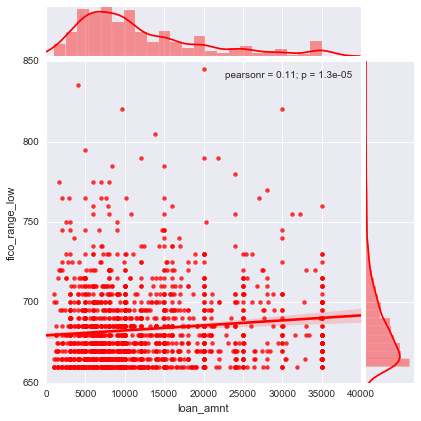

In [5]:
# Visualize 'charged off' loans

sns.jointplot(x="loan_amnt", y="fico_range_low", data=df[df['loan_status']=='Charged Off'], 
                   color='red', size=6, ratio=6, space=0.1, xlim=(0,40000), ylim=(650,850), kind='reg')

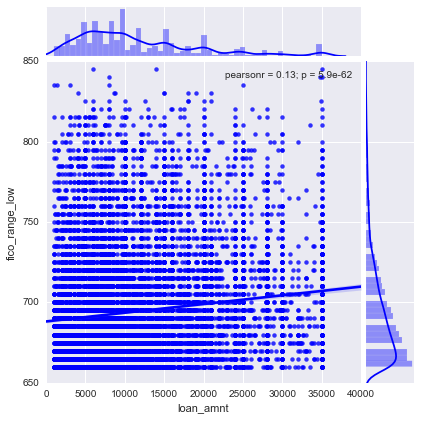

In [6]:
# Visualize 'fully paid' loans

sns.jointplot(x="loan_amnt", y="fico_range_low", data=df[df['loan_status']=='Fully Paid'], 
                   color='blue',size=6, ratio=6, space=0.1, xlim=(0,40000), ylim=(650,850), kind='reg')

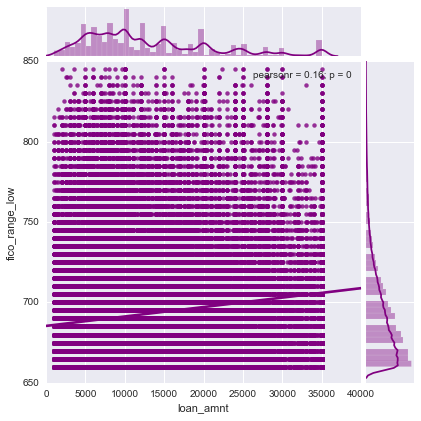

In [7]:
# Visualize 'current' loans

sns.jointplot(x="loan_amnt", y="fico_range_low", data=df[df['loan_status']=='Current'], 
                   color='purple',size=6, ratio=6, space=0.1, xlim=(0,40000), ylim=(650,850), kind='reg')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


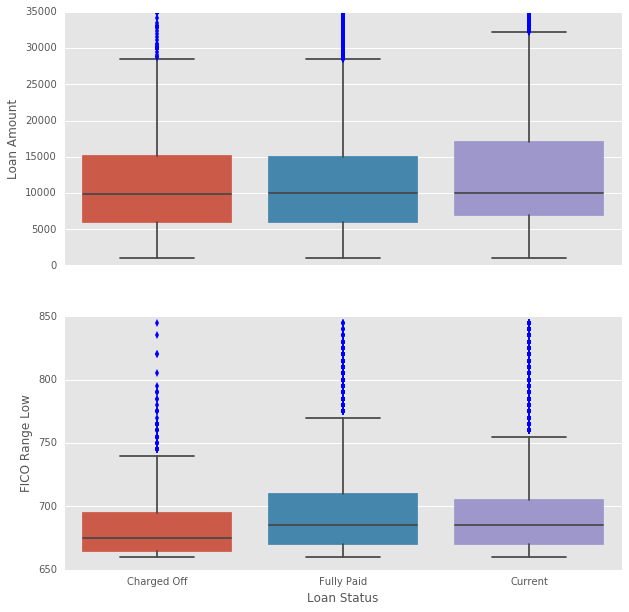

In [187]:
# Box plots of each

order = ['Charged Off','Fully Paid','Current']

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'], order=order, ax=ax1)
sns.boxplot(x=df['loan_status'],y=df['fico_range_low'], order=order, ax=ax2)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('Loan Amount')
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('FICO Range Low')


In [ ]:
# Statistical summary

coff = df['loan_status']=='Charged Off'
fullpaid = df['loan_status']=='Fully Paid'
inpayment = df['loan_status']=='Current'


print(df[['loan_amnt','fico_range_low']][coff].describe())
print(df[['loan_amnt','fico_range_low']][fullpaid].describe())
print(df[['loan_amnt','fico_range_low']][inpayment].describe())

In [191]:
# Anova
# Test the null hypothesis that two or more groups have the same population mean.
# For 95% confidence level, if p > 0.05 then means of 3 groups are not significantly different.

from scipy import stats
fscore1, pvalue1 = stats.f_oneway(df['loan_amnt'][charged], df['loan_amnt'][paidoff], df['loan_amnt'][current])
print(fscore1,pvalue1)
fscore2, pvalue2 = stats.f_oneway(df['fico_range_low'][charged], df['fico_range_low'][paidoff], 
                                df['fico_range_low'][current])
print(fscore2,pvalue2)

208.580508821 3.11591605319e-91
107.286890277 2.6717471585e-47


In [8]:
dfdummy = pd.get_dummies(df['loan_status'])
dumvars = dfdummy.columns
print(dumvars)
dfdummy.head(2)

Index(['Charged Off', 'Current', 'Fully Paid'], dtype='object')


,Charged Off,Current,Fully Paid
0,0,0,1
1,0,1,0


In [10]:
# Linear regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
ss = StandardScaler()
Xscaled = ss.fit_transform(df[['loan_amnt','fico_range_low']].astype(float))
linreg = LinearRegression()
linreg.fit(Xscaled,dfdummy)
for var,row,y0 in zip(dumvars, linreg.coef_, linreg.intercept_):
    print(var+':','loan amount and fico range low coefs:',row, 'intercepts:', y0)

Charged Off: loan amount and fico range low coefs: [-0.00041172 -0.0022099 ] intercepts: 0.00704048593158
Current: loan amount and fico range low coefs: [ 0.01145618 -0.00282209] intercepts: 0.924002074914
Fully Paid: loan amount and fico range low coefs: [-0.01104447  0.00503199] intercepts: 0.068957439154


In [200]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xscaled,df['loan_status'])
for var,row in zip(dumvars,logreg.coef_):
    print(var+':','loan amount and fico range low coefs:',row)

Charged Off: loan amount and fico range low coefs: [-0.05529229 -0.41463203]
Current: loan amount and fico range low coefs: [ 0.17535531 -0.03975771]
Fully Paid: loan amount and fico range low coefs: [-0.18481352  0.0757207 ]


## Answer to #3

First, from visual inspection of the distribution of FICO scores and loan amounts for each of the loan statuses (charged off, current, or fully paid) it is diffcult to identify an underlying pattern.

From the box plot representation of the loan distributions and the calculated statistics, it appears that the mean and median FICO score for 'Charged Off' is slightly lower than the other two loan outcomes. However this difference does not appear to be statistically significant according to a one-way ANOVA analysis. ***Wrong: ANOVA says the differences are likely to be statistically significant, p&lt;0.05.***

It also needs to be taken into consideration that these loan outcomes are very strongly skewed from a typical normal distribution and these methods may not be applicable. The skew towards low FICO scores makes sense as I would expect those consumers to have difficulty securing loans from traditional sources and would thus turn to a non-traditional lending agency for help.

From performing a linear regression, it appears that for the 'charged off' loans, FICO score has a stronger effect on determining that outcome and the amount of loans charged off increases with decreasing FICO score. In the other two cases, 'fully paid' and 'current', the loan amount has a stronger effect where more loans remain active for larger amounts and are paid off for smaller amounts.

In question #2, concerning the relationship between loan amounts and interest rates, there was not a strong trend between the two variables. There was a slight increase in the minimum interest rate for larger loans though. Here, the distribution of loan amounts that are current is shifted slightly higher (25 and 75 percentile are elevated) versus other outcomes. Larger loan amounts are more difficult to pay off in full and more difficult for riskier borrowers to obtain thus it makes sense that the less-risky borrowers are more likely to require a longer period of time for repayment.

# 4. What percentage of loans have been charged off as of October 2015?

In [121]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off'], dtype=object)

In [251]:
dfcharged = df[df['loan_status']=='Charged Off'].shape[0]
total = df.shape[0]
charged = dfcharged/total
print('Percentage charged off: {:.2%}'.format(charged))

Percentage charged off: 0.70%


## Answer #4

As of October 2015, which includes the entire dataset, 0.70% of all loans have been charged off.

# 5. Some of the loans which are marked “Current” in October 2015 will end up being charged off before they are paid in full. Using the fact that all of these loans are 3 years in length, estimate the probability that a randomly chosen loan would eventually become charged off, possibly after October 2015. Be sure to explain any assumptions you make.

In [126]:
# Loan issue dates

df['issue_d'].unique()

array(['Oct 2014', 'Nov 2014', 'Dec 2014', 'Jan 2015', 'Feb 2015',
       'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015',
       'Aug 2015', 'Sep 2015'], dtype=object)

In [252]:
# After one year, percentage fully paid

dfpaid = df[df['loan_status']=='Fully Paid'].shape[0]
total = df.shape[0]
paid = dfpaid/total
print('Percentage fully paid: {:.2%}'.format(paid))

Percentage fully paid: 6.90%


In [253]:
# After one year, loans still in repayment

curr = 1.0 - charged - paid
print('Percentage current: {:.2%}'.format(curr))

Percentage current: 92.40%


In [106]:
# After each year, assume fully paid and charged off rates remain constant

initial = np.array([0,1,0])

transmat = np.array([[1, 0, 0],[0.069, 0.9240, 0.007],[0, 0, 1]])

def markov(iterations):
    for n in range(iterations):
        if n==0:
            new = initial
        else:
            new = np.dot(new,transmat)
        print('Year {:}'.format(2015+n),'\t',new)

print('\t\t',df['loan_status'].unique().tolist())

markov(4)

		 ['Fully Paid', 'Current', 'Charged Off']
Year 2015 	 [0 1 0]
Year 2016 	 [ 0.069  0.924  0.007]
Year 2017 	 [ 0.132756  0.853776  0.013468]
Year 2018 	 [ 0.19166654  0.78888902  0.01944443]


In [10]:
# Distribution of loan issues by month

# df['issue_d'].apply(pd.value_counts).plot(kind='bar', subplots=True)
df['datetime'] = pd.to_datetime(df['issue_d'])
df.sort_values('datetime',inplace=True)
df['datetime'] = df['datetime'].apply(lambda x: x.strftime('%Y-%b'))
dfgroup = df.groupby(['loan_status','datetime'], sort=False).count()

In [11]:
# dfgroup.loc['Charged Off', 'issue_d']
# dfgroup.index.get_level_values(1)
sersort = dfgroup['member_id'].copy()
sersort.name='count'

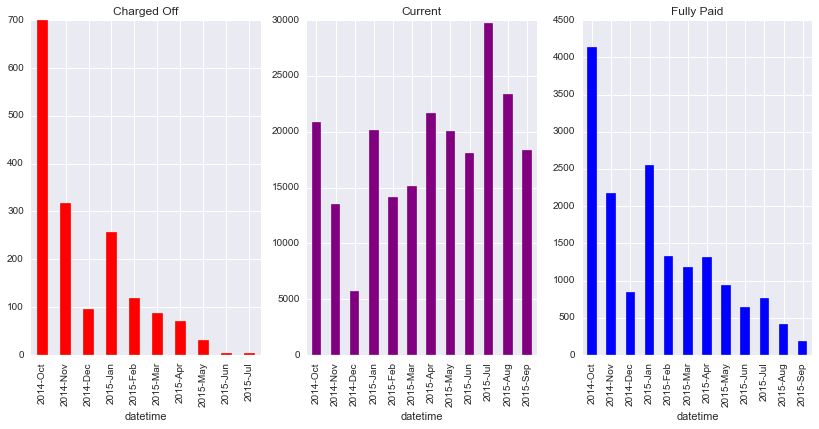

In [179]:
grps = sorted(sersort.index.get_level_values(0).unique().tolist())

f, axes = plt.subplots(1,3, figsize=(14,6))
for grp,ax,color in zip(grps, axes, ['red','purple','blue']):
    sersort.loc[grp].plot(kind='bar', color=color, ax=ax)
    ax.set_title(grp)

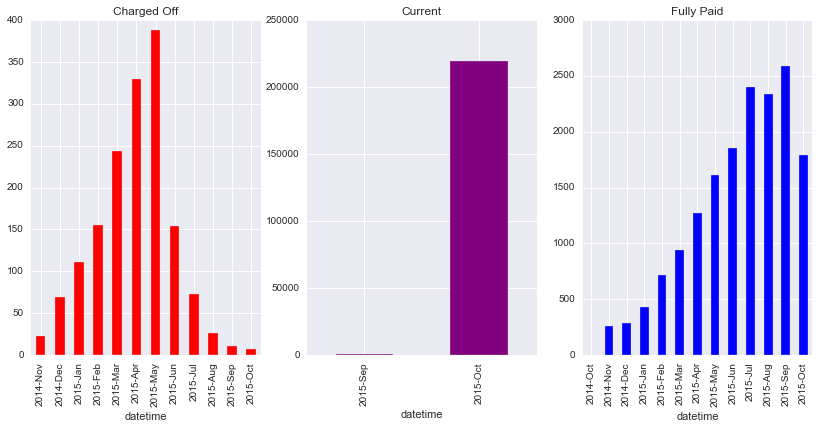

In [16]:
# Last payment date

dfnotnull = df[df['last_pymnt_d'].notnull()].copy()
dfnotnull['datetime'] = pd.to_datetime(dfnotnull['last_pymnt_d'])
dfnotnull.sort_values('datetime',inplace=True)
dfnotnull['datetime'] = dfnotnull['datetime'].apply(lambda x: x.strftime('%Y-%b'))
dfgroup = dfnotnull.groupby(['loan_status','datetime'],sort=False).count()

sersort = dfgroup['member_id'].copy()
sersort.name='count'

grps = sorted(sersort.index.get_level_values(0).unique().tolist())

f, axes = plt.subplots(1,3, figsize=(14,6))
for grp,ax,color in zip(grps, axes, ['red','purple','blue']):
    sersort.loc[grp].plot(kind='bar', color=color, ax=ax)
    ax.set_title(grp)

In [19]:
# autocorrelation

# from pandas.tools.plotting import autocorrelation_plot
# autocorrelation_plot([sersort.loc['Charged Off']])
# sersort.loc['Charged Off']

## Answer to #5

Assuming the rate at which loans transition from current to fully paid or charged off does not change from year-to-year, after 3 years have elapsed, the loans current as of October 2015 have a 1.9% chance of being charged off.

There isn't anything in the distribution of the issue dates or the last payment dates to indicate that the rate is not uniform.